# Bike Share Analysis with Visualization

This dataset contains the hourly and daily count of rental bikes in Washington DC between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.

In [1]:
import pandas as pd

In [2]:
bike = pd.read_csv('day.csv')

In [3]:
bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [4]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
# the working day has been encoded with 1 and 0 to denote working day and non-working day respectively
bike['workingday'].value_counts()

workingday
1    500
0    231
Name: count, dtype: int64

In [6]:
# converting the 'dteday' from object to datetime
bike['dteday'] = pd.to_datetime(bike['dteday'])

### Bike Rented over Time

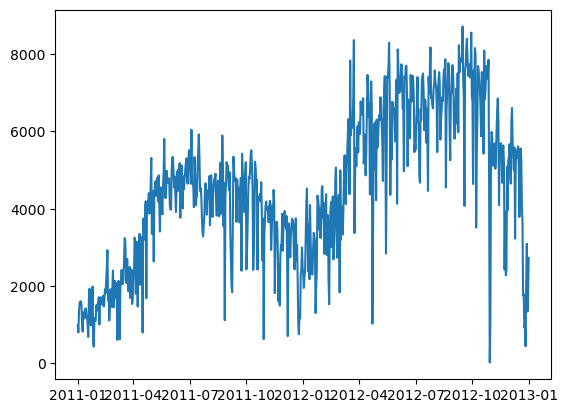

In [7]:
import matplotlib.pyplot as plt
plt.plot(bike['dteday'], bike['cnt'])
plt.show()

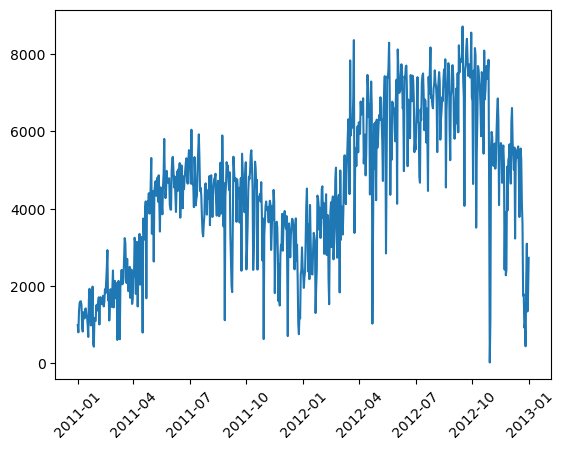

In [8]:
plt.plot(bike['dteday'], bike['cnt'])
plt.xticks(rotation=45)
plt.show()

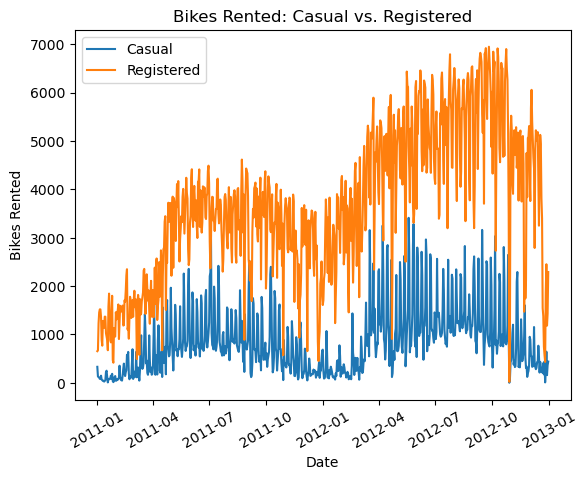

In [9]:
plt.plot(bike['dteday'], bike['casual'], label='Casual')
plt.plot(bike['dteday'], bike['registered'], label='Registered')
plt.xticks(rotation=30)
plt.ylabel('Bikes Rented')
plt.xlabel('Date')
plt.title('Bikes Rented: Casual vs. Registered')
plt.legend()
plt.show()

Looking at the entire two-year period, we see the number of rented bikes is at its lowest during the winter months and at its highest during the summer (Capital Bikeshare operates only in the northern hemisphere, so the summer months are June-August, and the winter months are December-February) and it is the same pattern for both casual and registered riders, with registered users generally hiring more

### Temperature over Time

Checking for Seasonality using temperature column

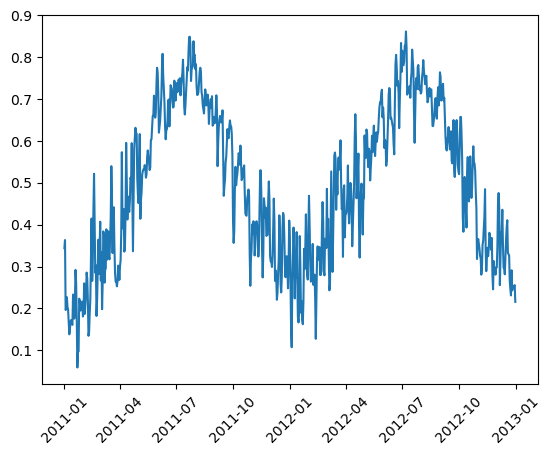

In [10]:
plt.plot(bike['dteday'], bike['temp'])
plt.xticks(rotation=45)
plt.show()

We see that when the temperature grows, the number of bike rentals tends to grow too. When the temperature decreases, the number of rentals tends to decrease too. Although the relationship isn't perfect, the values in the two columns follow similar patterns in how they change.

We are going to use scatterplots to get a better comparison between the two

### Bike Hires vs Temperature

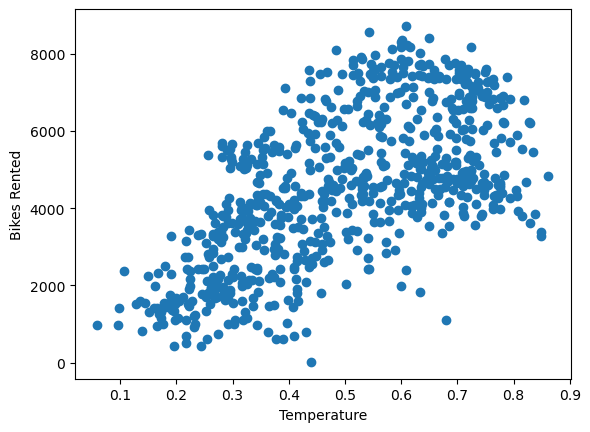

In [11]:
plt.scatter(bike['temp'], bike['cnt'])
plt.xlabel('Temperature')
plt.ylabel('Bikes Rented')
plt.show()

In the scatter plot above the overall direction of the points is upward (seen from left to right). This is because as the temperature increases, the number of bike rentals tends to grow too.

### Bike Rented vs Wind speed

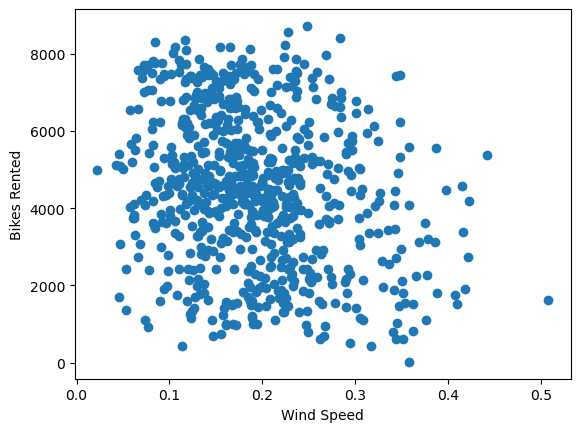

In [12]:
plt.scatter(bike['windspeed'], bike['cnt'])
plt.xlabel('Wind Speed')
plt.ylabel('Bikes Rented')
plt.show()

The plot above shows a negative correlation between Wind speed and Bikes rented, meaning that in higher winds people tend to rent less bikes.
This makes sense as riders will not want to ride bikes under serious wind and will prefer smaller wind speeds

###  Pearson correlation coefficient 

In [13]:
bike.corr()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
dteday,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494


#### Correlation between workingday, casual and registered column

In [14]:
bike.corr()['workingday'][['casual', 'registered']]

casual       -0.518044
registered    0.303907
Name: workingday, dtype: float64

we can see that the workingday column correlates negatively with casual column, meaning that during working days there are fewer casual riders than on weekends while it correlates positively with the registered riders which is likely as a result of them using it as a means of transportation during working days

##### Scatterplots showing causal and registered riders on working and non-working days

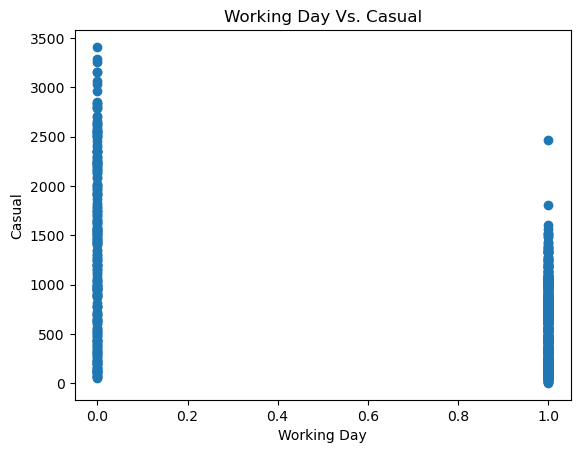

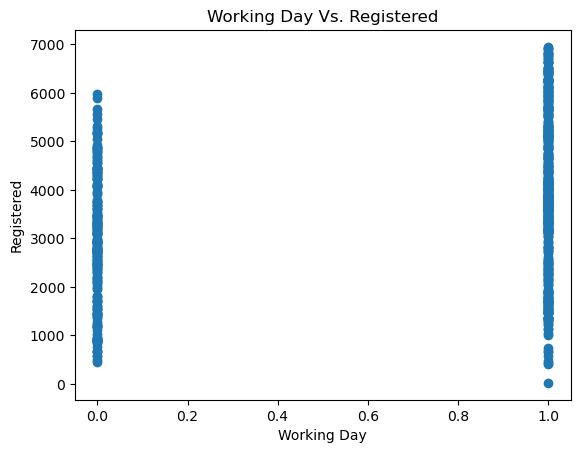

In [16]:
# workingday 
plt.scatter(bike['workingday'], bike['casual'])
plt.xlabel('Working Day')
plt.ylabel('Casual')
plt.title('Working Day Vs. Casual')
plt.show()

# workingday vs registered
plt.scatter(bike['workingday'], bike['registered'])
plt.xlabel('Working Day')
plt.ylabel('Registered')
plt.title('Working Day Vs. Registered')
plt.show()

In [28]:
bike.groupby('workingday').mean()[['casual', 'registered']]

,casual,registered
workingday,,
0,1371.134199,2959.034632
1,606.570000,3978.250000


On non-working days, casual users rent on average more than double the number of bikes they rent on working days: 1,371 bikes compared to 607 bikes.

Conversely, registered users rent significantly less during non-working days: 2,959 compared to 3,978 bikes.

##### Barplots showing casual and registered riders averages for working and non-working days

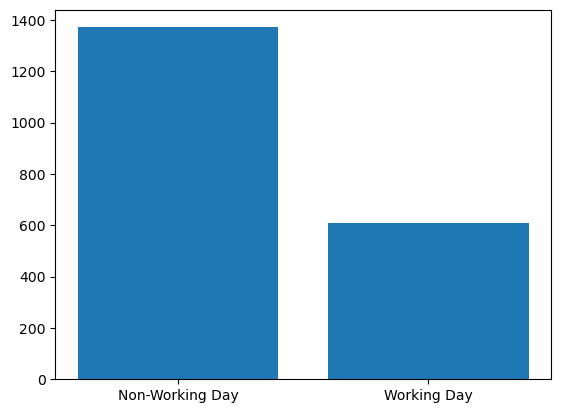

In [26]:
working_days = ['Non-Working Day', 'Working Day']
casual_avg = [1371, 607]

plt.bar(working_days, casual_avg)
plt.show()

The bar on the left is higher — it's more than twice as tall as the one on the right. That's because on non-working days casual users rent on average more than double the number of bikes they rent on working days.

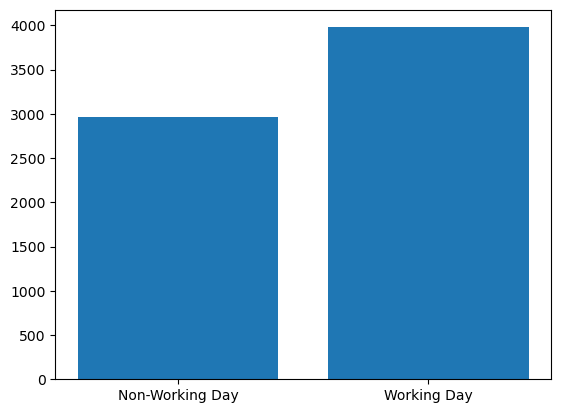

In [27]:
working_days = ['Non-Working Day', 'Working Day']
registered_avg = [2959, 3978]

plt.bar(working_days, registered_avg)
plt.show()

The reverse is the case for registered users as they use it hire more on weekdays than weekends

In [29]:
# The weekday column in our dataset describes the day of the week (0 is Sunday, and 6 is Saturday)
bike['weekday'].value_counts().sort_index()

weekday
0    105
1    105
2    104
3    104
4    104
5    104
6    105
Name: count, dtype: int64

In [33]:
weekday_averages = bike.groupby('weekday').mean()[['casual','registered']].reset_index()
weekday_averages

,weekday,casual,registered
0,0,1338.295238,2890.533333
1,1,674.133333,3663.990476
2,2,556.182692,3954.480769
3,3,551.144231,3997.394231
4,4,590.961538,4076.298077
5,5,752.288462,3938.000000
6,6,1465.257143,3085.285714


##### Barplot showing casual riders averages weekly

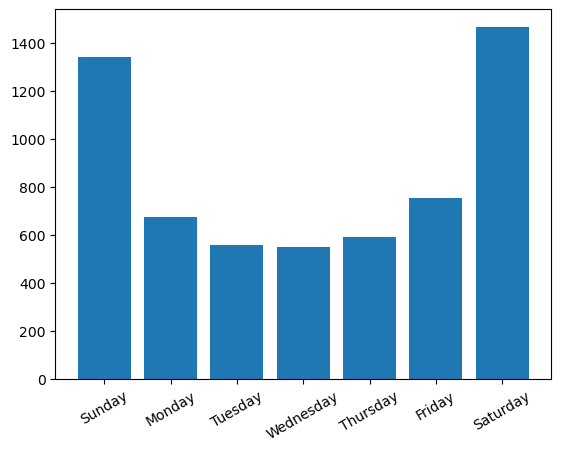

In [38]:
plt.bar(weekday_averages['weekday'], weekday_averages['casual'])
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6],
          labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday',
                 'Thursday', 'Friday', 'Saturday'],
          rotation=30)
plt.show()

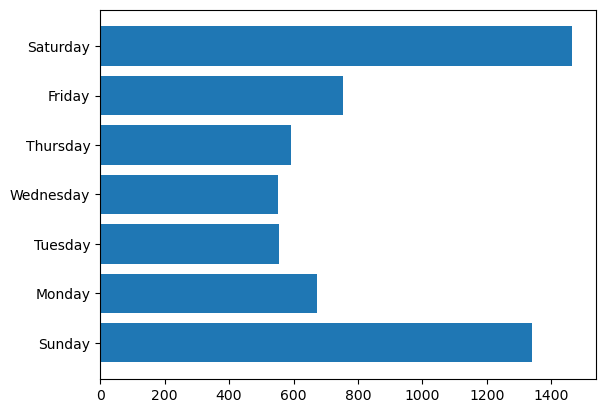

In [37]:
# horizontal bar plot
plt.barh(weekday_averages['weekday'], weekday_averages['casual'])
plt.yticks(ticks=[0, 1, 2, 3, 4, 5, 6],
          labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday',
                 'Thursday', 'Friday', 'Saturday'])
plt.show()

The first bar (Sunday) and the last one (Saturday) are more than twice as tall as all the other bars. This shows that casual users rent more bikes on the weekends, which corroborates our initial findings.

##### Barplot showing registered riders weekly

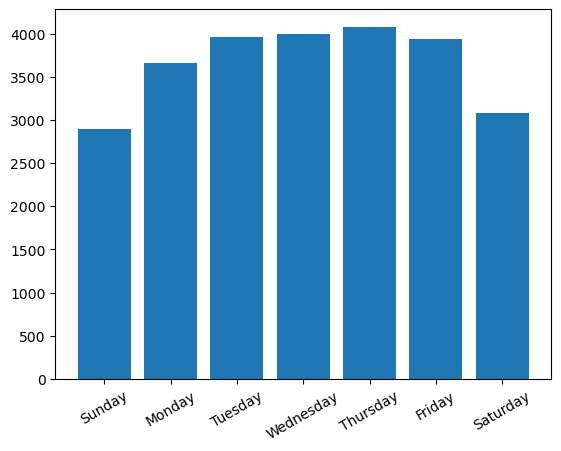

In [41]:
plt.bar(weekday_averages['weekday'], weekday_averages['registered'])
plt.xticks(ticks=[0,1,2,3,4,5,6],
          labels=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 
                  'Thursday', 'Friday', 'Saturday'],
          rotation=30)
plt.show()

We can see that registered users rent more bikes on weekdays than weekends

#### Examining the weathersit column

In [42]:
bike['weathersit'].value_counts()

weathersit
1    463
2    247
3     21
Name: count, dtype: int64

We only see three unique values above, but, according to the documentation, the weathersit column has four unique values (4 has a frequency of zero as a consequence):

* 1: clear or few clouds
* 2: mist or cloudy
* 3: light rain, light snow, thunderstorm
* 4: heavy rain, snow, ice pellets, fog

we will generate a barplot with their frequency, we will also add 4 in our unique values

In [44]:
unique_values = [1, 2, 3, 4]
weather_freq = [463, 247, 21, 0]

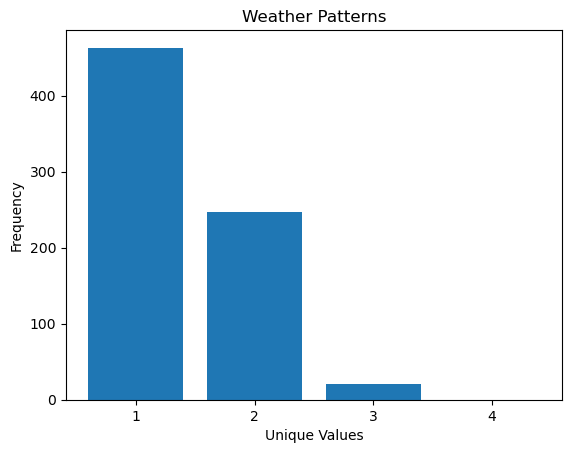

In [46]:
plt.bar(unique_values, weather_freq)
plt.xticks(ticks=[1,2,3,4])
plt.title('Weather Patterns')
plt.ylabel('Frequency')
plt.xlabel('Unique Values')
plt.show()

From the barchart we can clearly see that our weather in Washington DC was mostly good with light rain occuring very few times and heavy rain never occuring

#### Generating grouped frequency tables

In [48]:
# Casual users
casual_freq = bike['casual'].value_counts(bins=10).sort_index()
casual_freq

casual
(-1.4089999999999998, 342.8]    204
(342.8, 683.6]                  144
(683.6, 1024.4]                 165
(1024.4, 1365.2]                 89
(1365.2, 1706.0]                 44
(1706.0, 2046.8]                 23
(2046.8, 2387.6]                 26
(2387.6, 2728.4]                 22
(2728.4, 3069.2]                  9
(3069.2, 3410.0]                  5
Name: count, dtype: int64

In [49]:
# registered users
registered_freq = bike['registered'].value_counts(bins=10).sort_index()
registered_freq

registered
(13.073, 712.6]      14
(712.6, 1405.2]      44
(1405.2, 2097.8]     79
(2097.8, 2790.4]     80
(2790.4, 3483.0]    113
(3483.0, 4175.6]    144
(4175.6, 4868.2]     85
(4868.2, 5560.8]     71
(5560.8, 6253.4]     57
(6253.4, 6946.0]     44
Name: count, dtype: int64

##### Using Histogram

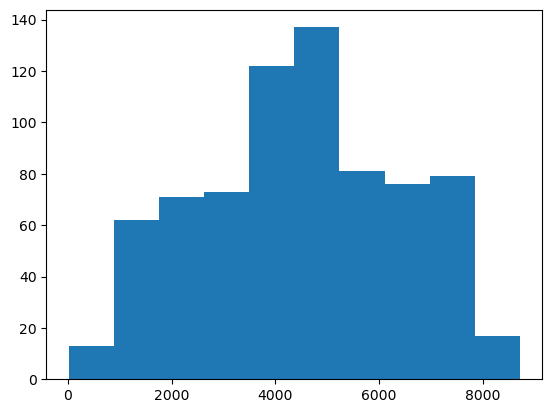

In [50]:
# for the cnt column
plt.hist(bike['cnt'])
plt.show()

Looking at the histogram we generated for the cnt column, we can make a few quick observations about the following:

* Range: Over the two years (2011 and 2012), the values ranged between 0 and 9,000 bike rentals.
* The distribution of the bike rentals:
**    Most typically, the number of bike rentals per day varies between 4,500 and 5,000 — the tallest bar is around that interval. The height of that bar indicates that we had about 140 days when rentals were between 4,500 and 5,000.
**  For most days, the number of rentals ranges between 1,000 and 7,500 — we see the tallest bars around this larger interval.
**  Most uncommonly, the number of rentals per day goes under 1,000 or over 8,000 — the bars are short around these values, with a frequency of 20 or less.

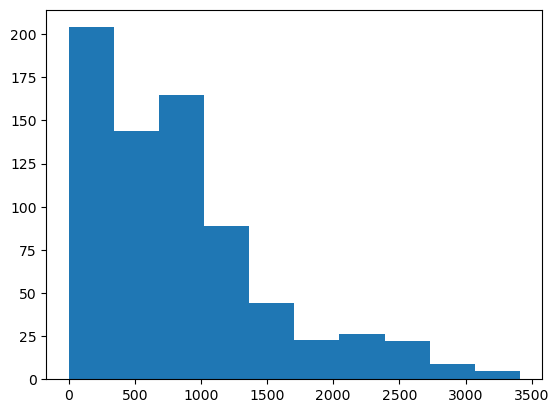

In [51]:
# for the casual column
plt.hist(bike['casual'])
plt.show()

We can clearly see a huge difference between this and the cnt column, as their are more days with rides below 500 than others and their is also more days with lower hires, the high hires have the lowest frquency.

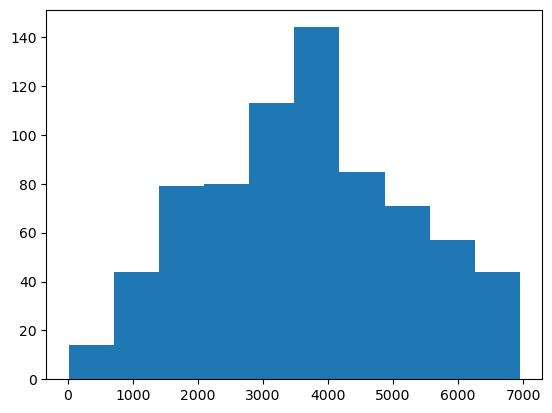

In [53]:
# for the registerd column
plt.hist(bike['registered'])
plt.show()